In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [18]:
data_portion=pd.read_csv("../summary_data/portion.captured.items.csv")
data_portion.tail()

,th,imrep_portion_items,mixcr_portion_items
1995,0.00020,0.032731,0.024266
1996,0.00015,0.032733,0.023459
1997,0.00010,0.032154,0.023044
1998,0.00005,0.028007,0.020202
1999,0.00000,0.023587,0.016848


In [19]:
colors = ['#F7941D', '#00b9f2', '#00a875', '#ecde38', '#0072bc', '#F15a22', '#da6fab']
sns.set_palette(sns.color_palette(colors))
sns.set_context('talk')
sns.set_style('white')

# Figure S4

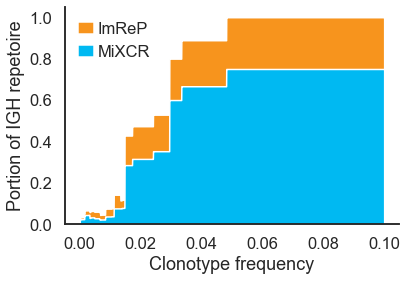

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1)


ax.stackplot(data_portion['th'], data_portion['imrep_portion_items'],labels=["ImReP"])
ax.stackplot(data_portion['th'], data_portion['mixcr_portion_items'],labels=["MiXCR"])

#ax.invert_xaxis()

plt.legend(bbox_to_anchor=(0.3,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1)


locs, labels = plt.xticks()
#plt.xticks(np.arange(0, 10, step=0.1))


ax.set_ylabel('Portion of IGH repetoire', fontsize='medium')   # relative to plt.rcParams['font.size']
ax.set_xlabel('Clonotype frequency', fontsize='medium')   # relative to plt.rcParams['font.size']

#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
sns.despine()

plt.savefig('../figures/FigureS4.png', bbox_inches='tight')
plt.savefig('../figures/FigureS4.pdf', bbox_inches='tight')

In [21]:
ig_frac = pd.read_csv('../summary_data/FigureS5_data.csv')
ig_frac.head()

,Tissue,IGH_frac,IGK_frac,IGL_frac
0,Adipose - Subcutaneous,0.165395,0.529489,0.305117
1,Adipose - Visceral (Omentum),0.167929,0.541701,0.290370
2,Adrenal Gland,0.163355,0.516319,0.320326
3,Artery - Aorta,0.179384,0.518335,0.302280
4,Artery - Coronary,0.162132,0.545206,0.292662


In [22]:
ig_frac.loc[:,'IGL'] = ig_frac['IGH_frac'] + ig_frac['IGK_frac'] + ig_frac['IGL_frac']
ig_frac.loc[:,'IGK'] = ig_frac['IGH_frac'] + ig_frac['IGK_frac']
ig_frac.loc[:,'IGH'] = ig_frac['IGH_frac']
ig_frac

,Tissue,IGH_frac,IGK_frac,IGL_frac,IGL,IGK,IGH
0,Adipose - Subcutaneous,0.165395,0.529489,0.305117,1.000000,0.694883,0.165395
1,Adipose - Visceral (Omentum),0.167929,0.541701,0.290370,1.000000,0.709630,0.167929
2,Adrenal Gland,0.163355,0.516319,0.320326,1.000000,0.679674,0.163355
3,Artery - Aorta,0.179384,0.518335,0.302280,1.000000,0.697720,0.179384
4,Artery - Coronary,0.162132,0.545206,0.292662,1.000000,0.707338,0.162132
5,Artery - Tibial,0.172368,0.544983,0.282649,1.000000,0.717351,0.172368
6,Bladder,0.185055,0.488384,0.326561,1.000000,0.673439,0.185055
7,Brain - Amygdala,0.143226,0.524121,0.332652,1.000000,0.667348,0.143226
8,Brain - Anterior cingulate cortex (BA24),0.176260,0.500778,0.322962,1.000000,0.677038,0.176260
9,Brain - Caudate (basal ganglia),0.167063,0.526215,0.306721,1.000000,0.693279,0.167063


# Figure S5

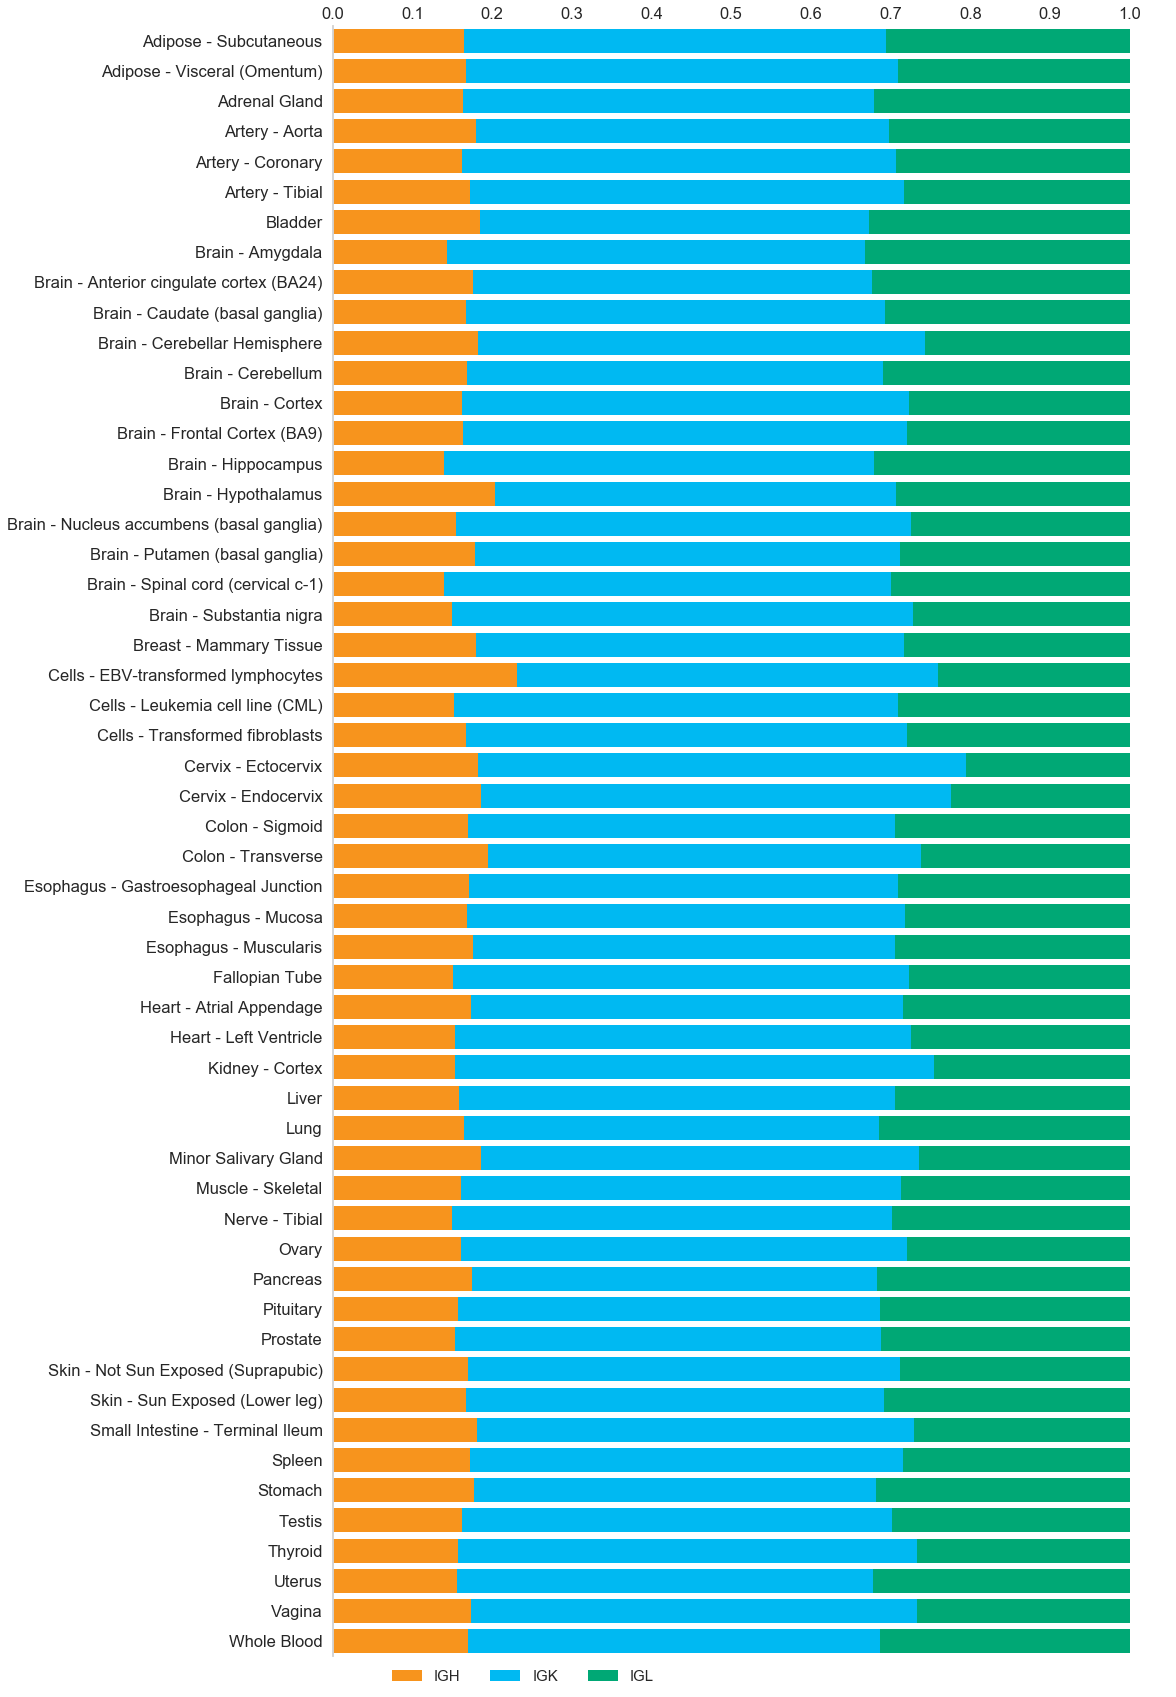

In [23]:
plt.figure(figsize=(15,30))

ax = sns.barplot(x = 'IGL', y = 'Tissue', data=ig_frac, color = '#00a875', saturation=1, linewidth=0)
ax = sns.barplot(x = 'IGK', y = 'Tissue', data=ig_frac, color = '#00b9f2', saturation=1, linewidth=0)
ax = sns.barplot(x = 'IGH', y = 'Tissue', data=ig_frac, color = '#F7941D', saturation=1, linewidth=0)

ax.set(xlabel='', ylabel='')
#plt.title('Clonotype Richness of B Cells', y=1.025, fontweight='bold', fontsize=25, loc='left')
ax.xaxis.set_ticks_position("top")
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0, pad=10)

leftbar = plt.Rectangle((0,0),1,1,fc="#F7941D", edgecolor = 'none')
centerbar = plt.Rectangle((0,0),1,1,fc='#00b9f2', edgecolor = 'none')
rightbar = plt.Rectangle((0,0),1,1,fc='#00a875', edgecolor = 'none')
l = plt.legend([leftbar, centerbar, rightbar], ['IGH', 'IGK', 'IGL'], bbox_to_anchor=(0.4,0), ncol = 3, 
               prop={'size':15})
l.draw_frame(False)
ax.spines['left'].set_color('lightgray')
plt.xticks([.1*x for x in range(0, 11, 1)])

sns.despine(bottom=True)
plt.savefig("../figures/FigureS5.pdf", bbox_inches='tight')
plt.savefig("../figures/FigureS5.png", bbox_inches='tight')

In [24]:
tissue_df = pd.read_csv('../summary_data/perSample_allChains_aditionalPhenotypes.csv')
tissue_df = tissue_df.rename(columns={' nCDR3_IGH': 'nCDR3_IGH'})
tissue_df.head()

,File_Name,tissue,histological site,nCDR3_IGH,nReads_IGH,Shanon_IGH,sample_x,tissue.1,histological site.1,nCDR3_IGK,...,Platform_s,SRA_Study_s,g1k_analysis_group_s,g1k_pop_code_s,gap_accession_s,gap_consent_code_s,source_s,study_design_s,study_name_s,submitter_handle_s
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,1,0.086406,-0.000000,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,6,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
1,G64389.GTEX-13SLW-0326.1,Muscle - Skeletal,Muscle,1,0.072324,-0.000000,G64389.GTEX-13SLW-0326.1,Muscle - Skeletal,Muscle,8,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
2,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,637,29.723199,6.270457,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,844,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
3,G18060.GTEX-OXRK-0526-SM-2YUMW.1,Artery - Tibial,Blood Vessel,0,0.000000,0.000000,G18060.GTEX-OXRK-0526-SM-2YUMW.1,Artery - Tibial,Blood Vessel,0,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
4,G21054.GTEX-T2IS-0011-R5A-SM-32QP4.1,Brain - Caudate (basal ganglia),Brain,0,0.000000,0.000000,G21054.GTEX-T2IS-0011-R5A-SM-32QP4.1,Brain - Caudate (basal ganglia),Brain,3,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx


In [25]:
tissues_of_interest = ['Cells - EBV-transformed lymphocytes', 'Colon - Sigmoid', 'Lung', 'Minor Salivary Gland', 
                       'Small Intestine - Terminal Ileum', 'Spleen']
plot_df = pd.DataFrame(columns=['tissue', 'nCDR3_IGH', 'nReads_IGH'])
for t in tissues_of_interest:
    tmp = tissue_df.loc[tissue_df['tissue'] == t, ['tissue', 'nCDR3_IGH', 'nReads_IGH']]
    plot_df = pd.concat([plot_df, tmp])
plot_df = plot_df.rename(columns={'tissue': 'Tissue Type'})
plot_df.head()

,Tissue Type,nCDR3_IGH,nReads_IGH
33,Cells - EBV-transformed lymphocytes,31,408.801020
57,Cells - EBV-transformed lymphocytes,36,665.759312
84,Cells - EBV-transformed lymphocytes,43,236.102107
102,Cells - EBV-transformed lymphocytes,45,254.320988
325,Cells - EBV-transformed lymphocytes,15,176.385542


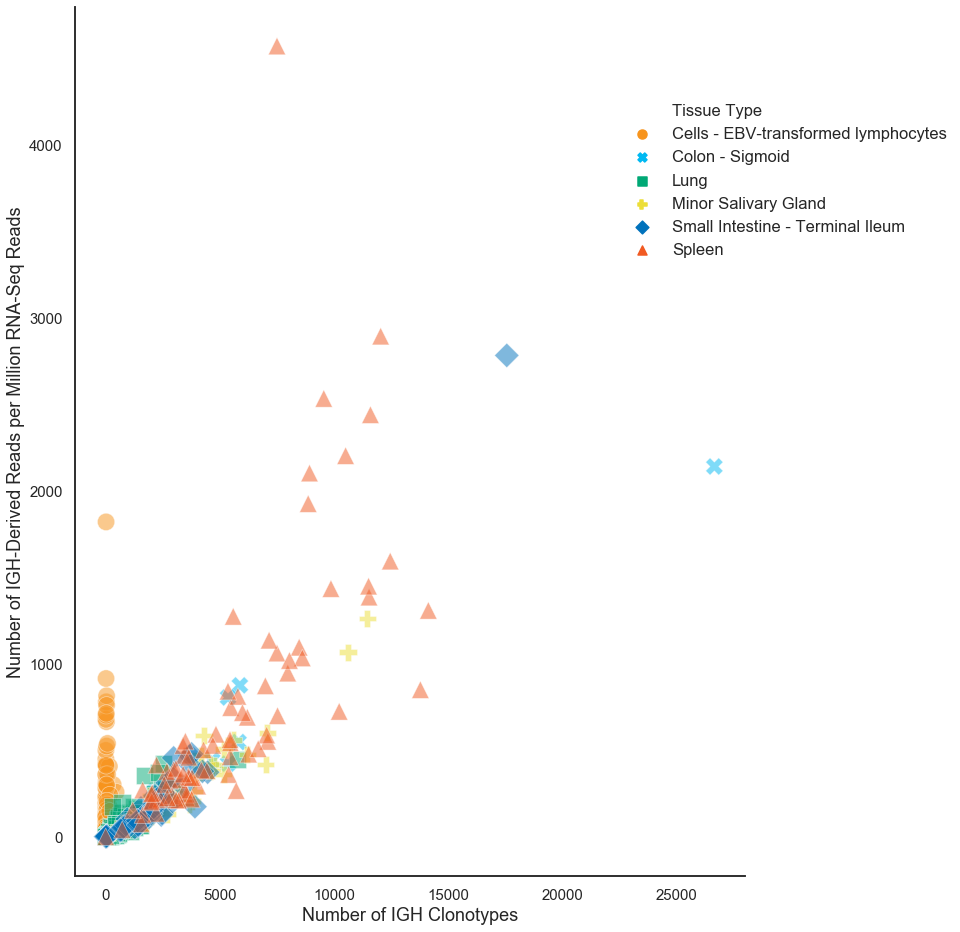

In [26]:
plt.figure(figsize=(12,16))
g = sns.scatterplot(data=plot_df, x = 'nCDR3_IGH', y = 'nReads_IGH', hue='Tissue Type', style='Tissue Type', 
                    alpha=.5, s=300)

plt.legend(frameon = False, loc='center left', bbox_to_anchor=(.8, .8))

g.set(xlabel='Number of IGH Clonotypes', ylabel='Number of IGH-Derived Reads per Million RNA-Seq Reads')

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
sns.despine()

plt.savefig('../figures/FigureS8.png', bbox_inches='tight')
plt.savefig('../figures/FigureS8.pdf', bbox_inches='tight')

In [27]:
df_raw=pd.read_csv('../summary_data/cdr3_perSample.csv')
df_raw.head()

,File_Name,site,tissue,type,cdr3
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQYDNLPITF
1,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQSFSTPRTF
2,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQSYSTPRTF
3,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CLQHYSAPHTF
4,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQRDFRVYTF


In [28]:
df_meta=pd.read_csv('../summary_data/perSample_allChains_aditionalPhenotypes.csv')
df_meta.head()

,File_Name,tissue,histological site,nCDR3_IGH,nReads_IGH,Shanon_IGH,sample_x,tissue.1,histological site.1,nCDR3_IGK,...,Platform_s,SRA_Study_s,g1k_analysis_group_s,g1k_pop_code_s,gap_accession_s,gap_consent_code_s,source_s,study_design_s,study_name_s,submitter_handle_s
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,1,0.086406,-0.000000,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,6,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
1,G64389.GTEX-13SLW-0326.1,Muscle - Skeletal,Muscle,1,0.072324,-0.000000,G64389.GTEX-13SLW-0326.1,Muscle - Skeletal,Muscle,8,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
2,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,637,29.723199,6.270457,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,844,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
3,G18060.GTEX-OXRK-0526-SM-2YUMW.1,Artery - Tibial,Blood Vessel,0,0.000000,0.000000,G18060.GTEX-OXRK-0526-SM-2YUMW.1,Artery - Tibial,Blood Vessel,0,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
4,G21054.GTEX-T2IS-0011-R5A-SM-32QP4.1,Brain - Caudate (basal ganglia),Brain,0,0.000000,0.000000,G21054.GTEX-T2IS-0011-R5A-SM-32QP4.1,Brain - Caudate (basal ganglia),Brain,3,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx


In [29]:
df=pd.merge(df_raw,df_meta,on='File_Name')
df.head()

,File_Name,site,tissue_x,type,cdr3,tissue_y,histological site,nCDR3_IGH,nReads_IGH,Shanon_IGH,...,Platform_s,SRA_Study_s,g1k_analysis_group_s,g1k_pop_code_s,gap_accession_s,gap_consent_code_s,source_s,study_design_s,study_name_s,submitter_handle_s
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQYDNLPITF,Bladder,Bladder,1,0.086406,-0.0,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
1,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQSFSTPRTF,Bladder,Bladder,1,0.086406,-0.0,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
2,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQSYSTPRTF,Bladder,Bladder,1,0.086406,-0.0,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
3,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CLQHYSAPHTF,Bladder,Bladder,1,0.086406,-0.0,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
4,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQRDFRVYTF,Bladder,Bladder,1,0.086406,-0.0,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx


In [30]:
df_ligth=df.loc[:,['File_Name','submitted_subject_id_s','tissue_x','histological site','type','cdr3']].reindex()
df_ligth['cdr3_ind']=df_ligth['submitted_subject_id_s'].astype(str)+'_'+df_ligth['cdr3']
df_ligth.head()

,File_Name,submitted_subject_id_s,tissue_x,histological site,type,cdr3,cdr3_ind
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQYDNLPITF,GTEX-SNMC_CQQYDNLPITF
1,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQSFSTPRTF,GTEX-SNMC_CQQSFSTPRTF
2,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQSYSTPRTF,GTEX-SNMC_CQQSYSTPRTF
3,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CLQHYSAPHTF,GTEX-SNMC_CLQHYSAPHTF
4,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQRDFRVYTF,GTEX-SNMC_CQQRDFRVYTF


In [31]:
df_IGK=df_ligth.loc[df_ligth['type'] == 'IGK']
df_IGK.head()

,File_Name,submitted_subject_id_s,tissue_x,histological site,type,cdr3,cdr3_ind
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQYDNLPITF,GTEX-SNMC_CQQYDNLPITF
1,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQSFSTPRTF,GTEX-SNMC_CQQSFSTPRTF
2,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQSYSTPRTF,GTEX-SNMC_CQQSYSTPRTF
3,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CLQHYSAPHTF,GTEX-SNMC_CLQHYSAPHTF
4,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQRDFRVYTF,GTEX-SNMC_CQQRDFRVYTF


In [32]:
df_IGK=df_IGK[['submitted_subject_id_s','cdr3']]
#remove dublicates, dublicates are due to CDR3 shared across tissues 
df_IGK_no_dublicates = df_IGK.drop_duplicates()
print ("No duplicates",df_IGK.shape)
print ("Duplicates",df_IGK_no_dublicates.shape)

No duplicates (1872707, 2)
Duplicates (1538809, 2)


In [33]:
df_IGK_no_dublicates['n_across_ind'] =  df_IGK_no_dublicates.groupby('cdr3')['cdr3'].transform('size')
df_IGK_no_dublicates.head()

/Users/jrotman/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,submitted_subject_id_s,cdr3,n_across_ind
0,GTEX-SNMC,CQQYDNLPITF,360
1,GTEX-SNMC,CQQSFSTPRTF,242
2,GTEX-SNMC,CQQSYSTPRTF,449
3,GTEX-SNMC,CLQHYSAPHTF,1
4,GTEX-SNMC,CQQRDFRVYTF,1


In [34]:
df_IGK['n_across_samples'] =  df_IGK.groupby('cdr3')['cdr3'].transform('size')
df_IGK.head()

,submitted_subject_id_s,cdr3,n_across_samples
0,GTEX-SNMC,CQQYDNLPITF,791
1,GTEX-SNMC,CQQSFSTPRTF,396
2,GTEX-SNMC,CQQSYSTPRTF,1473
3,GTEX-SNMC,CLQHYSAPHTF,1
4,GTEX-SNMC,CQQRDFRVYTF,1


In [35]:
df_IGK_final=pd.merge(df_IGK,df_IGK_no_dublicates,on='cdr3')
df_IGK_final=df_IGK_final[['cdr3','n_across_samples','n_across_ind']]
df_IGK_final=df_IGK_final.drop_duplicates()
df_IGK_final['n_across_tissues']=df_IGK_final['n_across_samples']-df_IGK_final['n_across_ind']
df_IGK_final.head()

,cdr3,n_across_samples,n_across_ind,n_across_tissues
0,CQQYDNLPITF,791,360,431
284760,CQQSFSTPRTF,396,242,154
380592,CQQSYSTPRTF,1473,449,1024
1041969,CLQHYSAPHTF,1,1,0
1041970,CQQRDFRVYTF,1,1,0


# Figure S9a

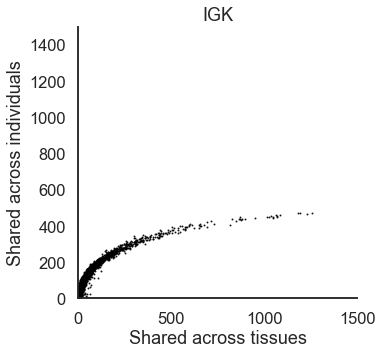

In [36]:
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(5,5))
g=sns.regplot(data=df_IGK_final , x='n_across_tissues', y='n_across_ind', fit_reg=False, scatter_kws={"s": 1}, 
             color='black')
g.set(xlabel='Shared across tissues', ylabel='Shared across individuals')
plt.title("IGK")
#g.set(xscale="log");
plt.ylim(-0.1, 1500)
plt.xlim(-0.1, 1500)
g=sns.despine()

plt.savefig('../figures/FigureS9_a.png', bbox_inches='tight')
plt.savefig('../figures/FigureS9_a.pdf', bbox_inches='tight')

In [37]:
stats.pearsonr(df_IGK_final['n_across_tissues'], df_IGK_final['n_across_ind'])

(0.7795362048814893, 0.0)

In [38]:
df_IGL=df_ligth.loc[df_ligth['type'] == 'IGL']
df_IGL.head()

,File_Name,submitted_subject_id_s,tissue_x,histological site,type,cdr3,cdr3_ind
6,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGL,CVLYMGSGISVF,GTEX-SNMC_CVLYMGSGISVF
7,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGL,CCSYAGDGTYVF,GTEX-SNMC_CCSYAGDGTYVF
8,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGL,CCSYAGPYTFVF,GTEX-SNMC_CCSYAGPYTFVF
677,G26533.GTEX-SIU7-0526-SM-3NM8I.1,GTEX-SIU7,Lung,Lung,IGL,CAAWDNTLRGVF,GTEX-SIU7_CAAWDNTLRGVF
678,G26533.GTEX-SIU7-0526-SM-3NM8I.1,GTEX-SIU7,Lung,Lung,IGL,CCSYEGSNTLVF,GTEX-SIU7_CCSYEGSNTLVF


In [39]:
df_IGL=df_IGL[['submitted_subject_id_s','cdr3']]
#remove dublicates, dublicates are due to CDR3 shared across tissues 
df_IGL_no_dublicates = df_IGL.drop_duplicates()
print ("No duplicates",df_IGL.shape)
print ("Duplicates",df_IGL_no_dublicates.shape)

No duplicates (596825, 2)
Duplicates (533737, 2)


In [40]:
df_IGL_no_dublicates['n_across_ind'] =  df_IGL_no_dublicates.groupby('cdr3')['cdr3'].transform('size')
df_IGL_no_dublicates.head()

/Users/jrotman/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,submitted_subject_id_s,cdr3,n_across_ind
6,GTEX-SNMC,CVLYMGSGISVF,291
7,GTEX-SNMC,CCSYAGDGTYVF,11
8,GTEX-SNMC,CCSYAGPYTFVF,9
677,GTEX-SIU7,CAAWDNTLRGVF,1
678,GTEX-SIU7,CCSYEGSNTLVF,2


In [41]:
df_IGL['n_across_samples'] =  df_IGL.groupby('cdr3')['cdr3'].transform('size')
df_IGL.head()

,submitted_subject_id_s,cdr3,n_across_samples
6,GTEX-SNMC,CVLYMGSGISVF,585
7,GTEX-SNMC,CCSYAGDGTYVF,11
8,GTEX-SNMC,CCSYAGPYTFVF,9
677,GTEX-SIU7,CAAWDNTLRGVF,1
678,GTEX-SIU7,CCSYEGSNTLVF,2


In [42]:
df_IGL_final=pd.merge(df_IGL,df_IGL_no_dublicates,on='cdr3')
df_IGL_final=df_IGL_final[['cdr3','n_across_samples','n_across_ind']]
df_IGL_final=df_IGL_final.drop_duplicates()
df_IGL_final['n_across_tissues']=df_IGL_final['n_across_samples']-df_IGL_final['n_across_ind']
df_IGL_final.head()

,cdr3,n_across_samples,n_across_ind,n_across_tissues
0,CVLYMGSGISVF,585,291,294
170235,CCSYAGDGTYVF,11,11,0
170356,CCSYAGPYTFVF,9,9,0
170437,CAAWDNTLRGVF,1,1,0
170438,CCSYEGSNTLVF,2,2,0


# Figure S9b

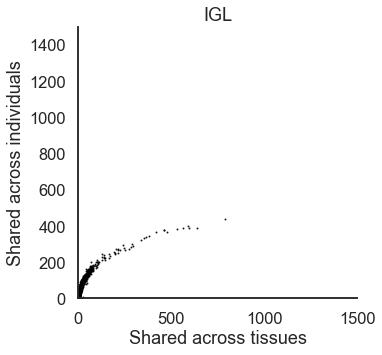

In [43]:
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(5,5))
g=sns.regplot(data=df_IGL_final , x='n_across_tissues', y='n_across_ind', fit_reg=False, scatter_kws={"s": 1}, 
             color = 'black')
g.set(xlabel='Shared across tissues', ylabel='Shared across individuals')
plt.title("IGL")
#g.set(xscale="log");
plt.ylim(-0.1, 1500)
plt.xlim(-0.1, 1500)
g=sns.despine()

plt.savefig('../figures/FigureS9_b.png', bbox_inches='tight')
plt.savefig('../figures/FigureS9_b.pdf', bbox_inches='tight')

In [44]:
stats.pearsonr(df_IGL_final['n_across_tissues'], df_IGL_final['n_across_ind'])

(0.7658968013864258, 0.0)

In [45]:
df_IGH=df_ligth.loc[df_ligth['type'] == 'IGH']
df_IGH.head()

,File_Name,submitted_subject_id_s,tissue_x,histological site,type,cdr3,cdr3_ind
17,G26533.GTEX-SIU7-0526-SM-3NM8I.1,GTEX-SIU7,Lung,Lung,IGH,CARLPAYINYAVDVW,GTEX-SIU7_CARLPAYINYAVDVW
18,G26533.GTEX-SIU7-0526-SM-3NM8I.1,GTEX-SIU7,Lung,Lung,IGH,CAKGTAAAPTPPDHW,GTEX-SIU7_CAKGTAAAPTPPDHW
19,G26533.GTEX-SIU7-0526-SM-3NM8I.1,GTEX-SIU7,Lung,Lung,IGH,CRTMGAPRESYFDVW,GTEX-SIU7_CRTMGAPRESYFDVW
20,G26533.GTEX-SIU7-0526-SM-3NM8I.1,GTEX-SIU7,Lung,Lung,IGH,CATEWENEHFYFDYW,GTEX-SIU7_CATEWENEHFYFDYW
21,G26533.GTEX-SIU7-0526-SM-3NM8I.1,GTEX-SIU7,Lung,Lung,IGH,CASSLYDLRNWFGPW,GTEX-SIU7_CASSLYDLRNWFGPW


In [46]:
df_IGH=df_IGH[['submitted_subject_id_s','cdr3']]
#remove dublicates, dublicates are due to CDR3 shared across tissues 
df_IGH_no_dublicates = df_IGH.drop_duplicates()
print ("No duplicates",df_IGH.shape)
print ("Duplicates",df_IGH_no_dublicates.shape)

No duplicates (245765, 2)
Duplicates (235600, 2)


In [47]:
df_IGH_no_dublicates['n_across_ind'] = df_IGH_no_dublicates.groupby('cdr3')['cdr3'].transform('size')
df_IGH_no_dublicates.head()

/Users/jrotman/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,submitted_subject_id_s,cdr3,n_across_ind
17,GTEX-SIU7,CARLPAYINYAVDVW,1
18,GTEX-SIU7,CAKGTAAAPTPPDHW,1
19,GTEX-SIU7,CRTMGAPRESYFDVW,1
20,GTEX-SIU7,CATEWENEHFYFDYW,1
21,GTEX-SIU7,CASSLYDLRNWFGPW,1


In [48]:
df_IGH['n_across_samples'] = df_IGH.groupby('cdr3')['cdr3'].transform('size')
df_IGH.head()

,submitted_subject_id_s,cdr3,n_across_samples
17,GTEX-SIU7,CARLPAYINYAVDVW,1
18,GTEX-SIU7,CAKGTAAAPTPPDHW,1
19,GTEX-SIU7,CRTMGAPRESYFDVW,1
20,GTEX-SIU7,CATEWENEHFYFDYW,1
21,GTEX-SIU7,CASSLYDLRNWFGPW,1


In [49]:
df_IGH_final=pd.merge(df_IGH,df_IGH_no_dublicates,on='cdr3')
df_IGH_final=df_IGH_final[['cdr3','n_across_samples','n_across_ind']]
df_IGH_final=df_IGH_final.drop_duplicates()
df_IGH_final['n_across_tissues']=df_IGH_final['n_across_samples']-df_IGH_final['n_across_ind']
df_IGH_final.head()

,cdr3,n_across_samples,n_across_ind,n_across_tissues
0,CARLPAYINYAVDVW,1,1,0
1,CAKGTAAAPTPPDHW,1,1,0
2,CRTMGAPRESYFDVW,1,1,0
3,CATEWENEHFYFDYW,1,1,0
4,CASSLYDLRNWFGPW,1,1,0


# Figure S9c

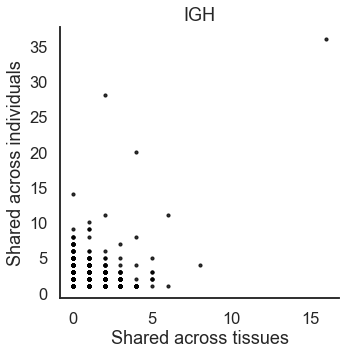

In [50]:
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(5,5))
g=sns.regplot(data=df_IGH_final , x='n_across_tissues', y='n_across_ind', fit_reg=False,scatter_kws={"s": 10},
             color = 'black')
g.set(xlabel='Shared across tissues', ylabel='Shared across individuals')
plt.title("IGH")
#g.set(xscale="log");
#plt.ylim(-0.1, 1500)
#plt.xlim(-0.1, 1500)
g=sns.despine()

plt.savefig('../figures/FigureS9_c.png', bbox_inches='tight')
plt.savefig('../figures/FigureS9_c.pdf', bbox_inches='tight')

In [51]:
stats.pearsonr(df_IGH_final['n_across_tissues'], df_IGH_final['n_across_ind'])

(0.14999408350824958, 0.0)

In [52]:
df_hash=pd.read_csv('../summary_data/data_hashimotos.csv')
df_hash=df_hash.loc[df_hash['type'] != 'focal']
df_hash.head()

,submitted_subject_id_s,n_cdr3_IGH,flag,note,type
0,GTEX-YFC4,5621,1,late stage hashimotos,hashimotos
1,GTEX-14BMU,5260,1,diff hashimotos,hashimotos
2,GTEX-11XUK,4435,1,mod degree of hashimotos,hashimotos
3,GTEX-S4UY,3581,1,diff hashimotos,hashimotos
4,GTEX-144FL,3540,1,? autolysis,hashimotos


In [53]:
df_hash.loc[df_hash['type'] == 'None', 'state'] = 'Healthy'
df_hash.loc[df_hash['type'] == 'early', 'state'] = 'Diseased'
df_hash.loc[df_hash['type'] == 'patchy', 'state'] = 'Diseased'
df_hash.loc[df_hash['type'] == ' hashimotos', 'state'] = 'Diseased'
df_hash.head()

,submitted_subject_id_s,n_cdr3_IGH,flag,note,type,state
0,GTEX-YFC4,5621,1,late stage hashimotos,hashimotos,Diseased
1,GTEX-14BMU,5260,1,diff hashimotos,hashimotos,Diseased
2,GTEX-11XUK,4435,1,mod degree of hashimotos,hashimotos,Diseased
3,GTEX-S4UY,3581,1,diff hashimotos,hashimotos,Diseased
4,GTEX-144FL,3540,1,? autolysis,hashimotos,Diseased


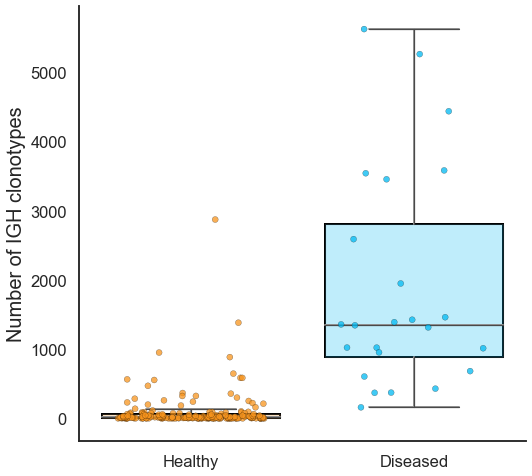

In [65]:
plt.figure(figsize=(8,8))
sns.set_style("white")
sns.set_context("talk")
g=sns.boxplot(y="n_cdr3_IGH", x="state", data = df_hash, order=['Healthy', 'Diseased'], saturation=1, 
              linewidth=2, fliersize=0, color='white', boxprops=dict(edgecolor='black'))
sns.boxplot(y="n_cdr3_IGH", x="state", data = df_hash, order=['Healthy', 'Diseased'], saturation=1, 
              linewidth=1.25, fliersize=0, boxprops=dict(alpha=.25))
sns.stripplot(y="n_cdr3_IGH", x="state", data = df_hash, order=['Healthy', 'Diseased'], jitter=.33, size=6,
              edgecolor='black', linewidth=.25, alpha=.75)
g.set(ylabel='Number of IGH clonotypes', xlabel='')
g.set_xticklabels(labels=['Healthy', 'Diseased'])
g.xaxis.label.set_size(20)
g.yaxis.label.set_size(20)

sns.despine()
plt.savefig("../figures/FigureS12.pdf", bbox_inches='tight')
plt.savefig("../figures/FigureS12.png", bbox_inches='tight')

In [64]:
df_hash.groupby("state").n_cdr3_IGH.describe().unstack()

       state   
count  Diseased      24.000000
       Healthy      180.000000
mean   Diseased    1890.250000
       Healthy       95.355556
std    Diseased    1585.291339
       Healthy      274.429965
min    Diseased     161.000000
       Healthy        0.000000
25%    Diseased     886.500000
       Healthy        5.000000
50%    Diseased    1351.500000
       Healthy       16.000000
75%    Diseased    2805.000000
       Healthy       61.750000
max    Diseased    5621.000000
       Healthy     2872.000000
dtype: float64

In [66]:
stats.mannwhitneyu(df_hash.loc[df_hash['state'] == 'Healthy', 'n_cdr3_IGH'],
                   df_hash.loc[df_hash['state'] == 'Diseased', 'n_cdr3_IGH'],
                   alternative='two-sided')

MannwhitneyuResult(statistic=83.0, pvalue=2.0691557215489194e-14)

In [ ]:
th_cast_df = pd.read_csv('../summary_data/th.CAST.csv')
th_cast_df

In [ ]:
th_cast_df['f-score'] = (2*th_cast_df['sens']*th_cast_df['ppv'])/(th_cast_df['sens'] + th_cast_df['ppv'])
th_cast_df = th_cast_df.rename(columns={'th' : 'Threshold', 'sens' : 'Recall', 'ppv' : 'Precision', 'f-score' : 'F1-Score'})
th_cast_df

# Figure S13

In [ ]:
plt.figure(figsize=(15, 5))

sns.lineplot(x = 'Threshold', y = 'Precision', marker = 'o', data = th_cast_df, color = "#000000")

plt.xticks(th_cast_df['Threshold'])

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

sns.despine()
plt.savefig('../figures/FigureS14_a.png', bbox_inches='tight')
plt.savefig('../figures/FigureS14_a.pdf', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(15, 5))

sns.lineplot(x = 'Threshold', y = 'Recall', marker = 'o', data = th_cast_df, color = "#000000")

plt.xticks(th_cast_df['Threshold'])

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)


sns.despine()
plt.savefig('../figures/FigureS14_b.png', bbox_inches='tight')
plt.savefig('../figures/FigureS14_b.pdf', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(15, 5))

sns.lineplot(x = 'Threshold', y = 'F1-Score', marker = 'o', data = th_cast_df, color = "#000000")

plt.xticks(th_cast_df['Threshold'])

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

sns.despine()
plt.savefig('../figures/FigureS14_c.png', bbox_inches='tight')
plt.savefig('../figures/FigureS14_c.pdf', bbox_inches='tight')

In [ ]:
fp_cast_df = pd.read_csv('../summary_data/FP.CAST.csv')
fp_cast_df.head()

In [ ]:
fp_cast_df['f-score'] = (2*fp_cast_df['sens']*fp_cast_df['ppv'])/(fp_cast_df['sens'] + fp_cast_df['ppv'])
fp_cast_df = fp_cast_df.astype({'cov' : 'str'})
#fp_cast_df = fp_cast_df.rename(columns={'x' : 'Threshold', 'sens' : 'Recall', 'ppv' : 'Precision', 'f-score' : 'F1-Score'})
fp_cast_df

In [ ]:
plt.figure(figsize=(6, 4))

tmp = fp_cast_df.loc[fp_cast_df['x'] == 50]
ax = sns.lineplot(x = 'cov', y = 'f-score', hue = 'type', style = 'type', data = tmp, markers = True, sort = False)

ax.set_ylabel('F1-Score', fontsize='large')
ax.set_xlabel('Coverage', fontsize='large')

plt.legend(frameon = False, loc='center left', bbox_to_anchor=(1, .5))

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

sns.despine()
plt.savefig('../figures/FigureS15_a.png', bbox_inches='tight')
plt.savefig('../figures/FigureS15_a.pdf', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(6, 4))

tmp = fp_cast_df.loc[fp_cast_df['x'] == 75]
ax = sns.lineplot(x = 'cov', y = 'f-score', hue = 'type', style = 'type', data = tmp, markers = True, sort = False)

ax.set_ylabel('F1-Score', fontsize='large')
ax.set_xlabel('Coverage', fontsize='large')

plt.legend(frameon = False, loc='center left', bbox_to_anchor=(1, .5))

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

sns.despine()
plt.savefig('../figures/FigureS15_b.png', bbox_inches='tight')
plt.savefig('../figures/FigureS15_b.pdf', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(6, 4))

tmp = fp_cast_df.loc[fp_cast_df['x'] == 100]
ax = sns.lineplot(x = 'cov', y = 'f-score', hue = 'type', style = 'type', data = tmp, markers = True, sort = False)

ax.set_ylabel('F1-Score', fontsize='large')
ax.set_xlabel('Coverage', fontsize='large')

plt.legend(frameon = False, loc='center left', bbox_to_anchor=(1, .5))

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

sns.despine()
plt.savefig('../figures/FigureS15_c.png', bbox_inches='tight')
plt.savefig('../figures/FigureS15_c.pdf', bbox_inches='tight')